In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle



In [2]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)


pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)


pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)


BARN SWALLOW


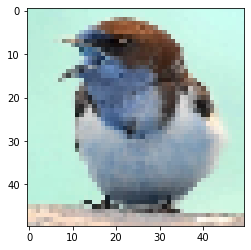

In [3]:
os.chdir(r"F:\Projects\learn\deep learning\convnet\dataset\test")
CATEGORIES = [str(i) for i in os.listdir()]

def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)


# type(np.asarray(y_test))

# IMG_INDEX = 4  # change this to look at other images

# imshow(X[IMG_INDEX])
# print(CATEGORIES[y[IMG_INDEX]])



NORTHERN BALD IBIS


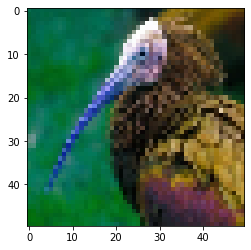

In [4]:
# IMG_INDEX = 4  # change this to look at other images

# imshow(X_test[IMG_INDEX])
# print(CATEGORIES[y_test[IMG_INDEX]])

In [5]:
#X_test[4]

array([[[  6, 107,  76],
        [  1,  96,  70],
        [  1,  98,  72],
        ...,
        [112,  77,   4],
        [ 96,  69,  10],
        [ 92,  67,   8]],

       [[  2,  97,  61],
        [  4,  97,  70],
        [  1,  95,  70],
        ...,
        [ 85,  55,  11],
        [ 75,  48,  15],
        [ 73,  47,  12]],

       [[  3,  94,  54],
        [  3,  95,  66],
        [  2,  96,  71],
        ...,
        [ 58,  36,  17],
        [ 57,  35,  20],
        [ 54,  35,  19]],

       ...,

       [[  2, 108,  10],
        [  4, 111,  14],
        [  4, 106,  26],
        ...,
        [138,  80,  66],
        [152, 106,  50],
        [137,  91,  47]],

       [[  0, 109,  11],
        [  2, 113,  14],
        [  1, 110,  18],
        ...,
        [120,  54,  49],
        [149, 111,  20],
        [145, 115,  23]],

       [[  2, 103,  18],
        [  2, 106,  18],
        [  4, 108,  13],
        ...,
        [104,  54,  34],
        [114,  92,  10],
        [114,  90,   7]]

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(285))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [10]:
y_test = np.array(y_test)
y = np.array(y)

X = tf.stack(X)
X_test = tf.stack(X_test)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X, y, epochs=250, 
                    validation_data=(X_test, y_test))

Epoch 1/10
 490/1280 [==========>...................] - ETA: 15s - loss: 5.7346 - accuracy: 0.004

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

In [ ]:
model.save('saved_model/my_model')